<div align="center">

# <span style="font-size: 2em;">Welcome to the Perceptron!</span>

</div>

![HeaderBi](Adobe Express - file.png)


#### Supervised Learning

To create a better picture of what the perceptron really is, I will start from an earlier conversation about Supervised learning as a type of machine learning. As earlier mentioned, in supervised learning, the model assumes that for every set of data {$x$}, there exists a function $f(x)$ which creates label {$y$} for the measurements. In other words, there exists a function $f(x)$ which takes in an instance of $x^{i}$ and returns $y^{i}$. The term supervised comes from the fact that in this case, we happen to know some [$x$, $y$] pairs assigned by the function $f(x)$. The model now need to make predictions on more measurements not part of $x$. Supervised learning can be devided into two: 

1. Regression $\rightarrow$ which is a model in which $y$ is a real number and
2. Classification $\rightarrow$ which is model in which $y$ is categorical, i.e separating data with some function.


#### The general Framework


#### The single Neuron Model
To better explain the perceptron, take this analogy

$\dagger$ Take a very simple mono-neuron creature that can only receive two stimuli at once. The organism can only sense sun's heat and light, and react accordingly, by either moving into its burrow in the case of excess light, or into a nearby water-well in the case of excess heat. Therefore, technically speaking, the organism has a binary of choices, i.e, either go to the burrow or to the water-well, depending on the magnitude of the of either of the stimuli or a linear combination of both —— taking into account some personal bias and preference, i.e, how much heat is excess to the creature. This is the basic set up of the perceptron. As shown in the figure below, $x_1^{(i)}$, $x_2^{(i)}$ are the two inputs in this case, the heat or light. 

![The Perceptron](IMG_0184.jpg)

The $W$ in this case is the weight, or the the measure of "how much" of the stimuli causes the reaction. These measure "weight" of a consideration of the input signal. Think of this as what determins whether the organism would rather go to the burrow or into the well. The $b$ is the bias, which comes in handy in cases of a linear combination of the inputs, in this case and $y_1^{(i)}$ is the output, or the labels, for some given $x_1^{(i)}$.

The $Z$ region can be defined as the preactivation region with some preactivation value $z$ given as 

$$Z = w_1x_1^{i} + w_2x_2^i +b $$ 

and $a$ is the post-activation region where $$ a = \Phi z $$ for some actication function $\Phi$. In our case study of the small organism, 




In [54]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()



In [55]:
df = pd.read_csv("iris_dataset.csv")

In [56]:
y = df.iloc[0:100].species.values
y = np.where(y== "setosa", -1,1 )

x= df[["sepal_length" , "sepal_width"]].iloc[:100].values

In [57]:
class Perceptron(object):
   def __init__(self, eta = .5, epochs=50):
      self.eta = eta
      self.epochs = epochs
    

   def train(self, x, y):
      self.w_ = np.random.rand(1 + x.shape[1])
      self.errors = []
      for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(x,y):
                update = self.eta * self.predict(xi) - target
                self.w_[:-1] -= update *xi
                self.w_[-1] -= update
                errors = int(update !=0 )
            self.errors.append(errors)

      return self
   

   def net_imput (self,x):
        return np.dot(x, self.w_[:-1]) + self.w_[-1]
   
   def predict (self,x):
        return np.where(self.net_imput(x) >=0 ,1, -1) 
   
       


    


In [58]:
percep = Perceptron(epochs = 5_000)

percep.train(x,y)

<function matplotlib.pyplot.show(close=None, block=None)>

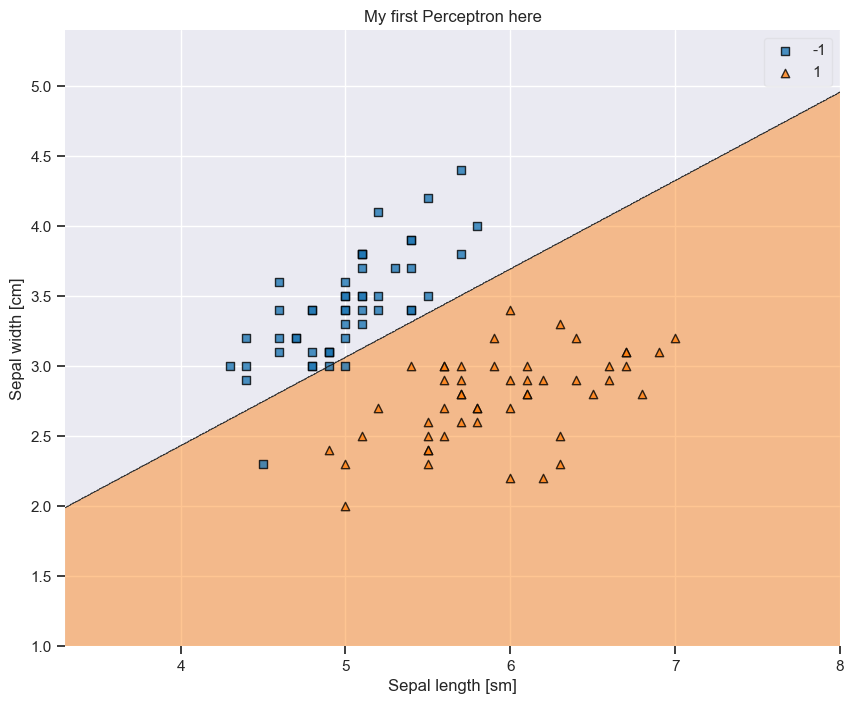

In [59]:
plt.figure(figsize = (10 , 8) )
plot_decision_regions(x,y, clf = percep)

plt.title("My first Perceptron here")
plt.xlabel("Sepal length [sm]")
plt.ylabel("Sepal width [cm]")

plt.show

Text(0, 0.5, 'Sepal width [cm]')

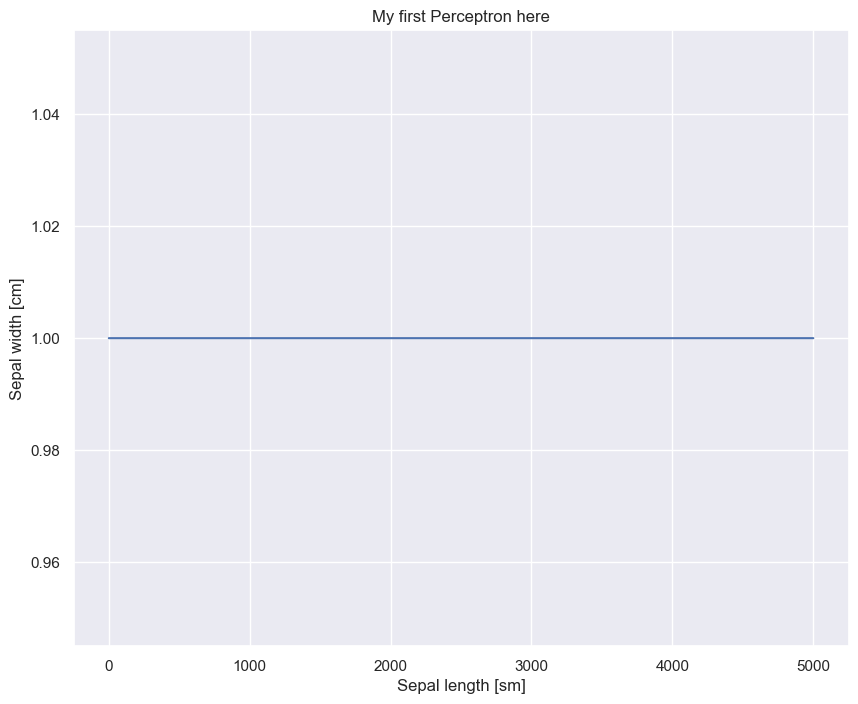

In [60]:
plt.figure(figsize = (10 , 8) )
plt.plot(range(1, len(percep.errors)+1), percep.errors)

plt.title("My first Perceptron here")
plt.xlabel("Sepal length [sm]")
plt.ylabel("Sepal width [cm]")